In [1]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/nike/Downloads/Luxury_Beauty.json.gz')

In [2]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [28]:
df['verified'].value_counts()

verified
True     504542
False     70086
Name: count, dtype: int64

In [3]:
df['asin'].value_counts()

asin
B0013U0EYI    6954
B00172O9NO    6138
B00176GSEI    5262
B0017SWIU4    4300
B0002ZW5UQ    3460
              ... 
B00870G0BI       1
B00A7HYQY2       1
B00K7LW8KC       1
B000JTSG9E       1
B01HJ2UY1G       1
Name: count, Length: 12120, dtype: int64

In [4]:
df.shape

(574628, 12)

In [5]:
df['reviewText'].head().tolist()

["I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.",
 'Believe me, over the years I have tried many, many different hand creams. I am one of those people whose hands get so dry they have little cracks all over them.\n\nOf all the hand creams, this is the best. It really moisturizes but doesn\'t leave your hands feeling greasy. And it lasts. I think a lot of lotions just have too much water in them. It has a very nice, subtle scent. I have to avoid a lot of lotions just because the scent is too strong!\n\nI am overall very "frugal" but I think this cream is worth the money.',
 'Great hand lotion',
 'This is the best for the severely dry skin on my hands',
 'The best non- oily hand cream ever. It heals overnight.']

In [22]:
metadata = getDF("/Users/nike/Downloads/meta_Luxury_Beauty.json.gz")
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [23]:
metadata['brand'].value_counts().head()

brand
              12287
UNITE Hair        4
PUR               3
PHYTO             1
bliss             1
Name: count, dtype: int64

In [24]:
metadata['details'].head().tolist()

[{'\n    Product Dimensions: \n    ': '2.2 x 2.2 x 7 inches ; 8.8 ounces',
  'Shipping Weight:': '14.4 ounces (',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item can be shipped to select countries outside of the U.S.',
  'ASIN:': 'B00004U9V2',
  'Item model number:': '4113'},
 {'\n    Product Dimensions: \n    ': '3 x 3.5 x 6 inches ; 2.2 pounds',
  'Shipping Weight:': '2.6 pounds',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item is not eligible for international shipping.',
  'ASIN:': 'B0000531EN',
  'Item model number:': '017N'},
 {'\n    Product Dimensions: \n    ': '5.1 x 3 x 5.5 inches ; 2.48 pounds',
  'Shipping Weight:': '2.6 pounds',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item is not eligible for international shipping.',
  'ASIN:': 'B0000532JH',
  'Item model number:': '018N'},
 {'\n    Product Dimensions: \n    ': '

In [7]:
metadata['title'].value_counts().head()

title
OPI Infinite Shine                                                                                             36
Glo Skin Beauty Pressed Base - Mineral Makeup Pressed Powder Foundation, 20 Shades|Cruelty Free                14
essie Nail Color Polish                                                                                        12
HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results                   12
bkr Glass Water Bottle with Smooth Silicone Sleeve for Travel, Narrow Mouth, BPA-Free &amp; Dishwasher Safe    11
Name: count, dtype: int64

In [9]:
metadata['asin'].value_counts().head()

asin
B00004U9V2    2
B00027U5Q0    2
B00021UR3C    2
B0002279MS    2
B0002279LY    2
Name: count, dtype: int64

In [13]:
# checking duplicates in metadata
duplicates = metadata[metadata.duplicated(['asin'], keep=False)]
print("Number of duplicate ASINs in metadata:", duplicates.shape[0])

Number of duplicate ASINs in metadata: 376


In [14]:
# droping duplicates in metadata
metadata = metadata.drop_duplicates(subset=['asin'], keep='first')
print("Number of ASINs after dropping duplicates:", metadata['asin'].nunique())

Number of ASINs after dropping duplicates: 12111


In [15]:
metadata['asin'].value_counts().head()

asin
B00004U9V2    1
B00K9R0J4G    1
B00K7EFJW8    1
B00K7LAVOW    1
B00K7LW8KC    1
Name: count, dtype: int64

In [30]:
# checking reviews for duplicates
duplicates_reviews = df[df.duplicated(['reviewText'], keep=False)]
print("Number of duplicate reviews:", duplicates_reviews.shape[0])

Number of duplicate reviews: 148954


In [31]:
# removing duplicate reviews
df = df.drop_duplicates(subset=['reviewText'], keep='first')
print("Number of reviews after dropping duplicates:", df.shape[0])

Number of reviews after dropping duplicates: 473932


Here, I want to create a dataset which is used to analyize sentiment analysis for client and help customer, so I will be using the Amazon dataset which is available on Kaggle. The dataset contains reviews of products from Amazon, and I will be focusing on the metadata and reviews to perform sentiment analysis.

There is two datasets available in the Amazon dataset: Metadata and Reviews. But I want to focus on only few columns from the metadata and reviews datasets. 

From Metadata: ['asin', 'title', 'details', 'description', 'imageURLHighRes']

From Reviews: ['overall', 'vote', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime']

In [32]:
# now, it's time to choose the columns from metadata and reviews datasets
metadata = metadata[['asin', 'title', 'details', 'description', 'imageURLHighRes']]
df = df[['overall', 'vote', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime']]

In [34]:
# now, let's convert the unixReviewTime to a readable datetime format
import datetime
df['reviewTime'] = df['unixReviewTime'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# checking the first few rows of the updated dataframe,
df.drop(columns=['unixReviewTime'], inplace=True)  # dropping the unixReviewTime column as it's no longer needed
df.head()

,overall,vote,verified,reviewTime,asin,reviewText,summary
0,2.0,3,True,2010-06-15 05:30:00,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,14,True,2010-01-07 05:30:00,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,NaN,True,2018-04-18 05:30:00,B00004U9V2,Great hand lotion,Five Stars
3,5.0,NaN,True,2018-04-18 05:30:00,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5.0,NaN,True,2018-04-17 05:30:00,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [37]:
# remove the time from reviewTime leaving only datetime
df['reviewTime'] = df['reviewTime'].dt.date
df.head()

,overall,vote,verified,reviewTime,asin,reviewText,summary
0,2.0,3,True,2010-06-15,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5.0,14,True,2010-01-07,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5.0,NaN,True,2018-04-18,B00004U9V2,Great hand lotion,Five Stars
3,5.0,NaN,True,2018-04-18,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5.0,NaN,True,2018-04-17,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [38]:
metadata.shape, df.shape

((12299, 5), (473932, 7))

In [39]:
# finally, now we can join it
new_df = pd.merge(df, metadata, on='asin', how='left')
new_df.shape

(497956, 11)

In [42]:
# checking duplicates
# The 'details', 'description', and 'imageURLHighRes' columns contain unhashable types (dict/list).
# Convert them to strings to use duplicated().

temp = new_df.copy()
for col in ['details', 'description', 'imageURLHighRes']:
	temp[col] = temp[col].astype(str)

temp.duplicated().sum()

np.int64(24024)

In [45]:
# taking duplicate ids from temp and removing them from new_df
duplicate_ids = temp[temp.duplicated()].index
new_df = new_df[~new_df.index.isin(duplicate_ids)]
new_df.shape

(473932, 11)

In [47]:
# cheking the asin column for only one value
new_df['asin'].str.len().value_counts().head()

asin
10    473932
Name: count, dtype: int64

In [48]:
new_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'asin', 'reviewText',
       'summary', 'title', 'details', 'description', 'imageURLHighRes'],
      dtype='object')

In [49]:
# rearranging columns for better readability
new_columns = ['asin', 'title', 'details', 'description', 'imageURLHighRes',
               'overall', 'vote', 'verified', 'reviewTime', 'reviewText', 'summary']
new_df = new_df[new_columns]
new_df.head()

,asin,title,details,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,2.0,3,True,2010-06-15,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,14,True,2010-01-07,"Believe me, over the years I have tried many, ...",Best hand cream ever.
4,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,Great hand lotion,Five Stars
6,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,This is the best for the severely dry skin on ...,Five Stars
8,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-17,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [54]:
new_df['details'].head(1).tolist()

[{'\n    Product Dimensions: \n    ': '2.2 x 2.2 x 7 inches ; 8.8 ounces',
  'Shipping Weight:': '14.4 ounces (',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item can be shipped to select countries outside of the U.S.',
  'ASIN:': 'B00004U9V2',
  'Item model number:': '4113'}]

In [62]:
new_df['description'].head(1).tolist()

[['After a long day of handling thorny situations, our new hand therapy pump is just the help you need. It contains shea butter as well as extracts of yarrow, clover and calendula to help soothe and condition work-roughened hands.',
  'By Crabtree & Evelyn',
  'The aromatic benefits of herbs are varied and far-reaching, so we combined a whole bunch of them into one restoratively fragrant line-up straight from the garden.',
  'We&#039;ve formulated our Gardeners Hand Therapy with Myrrh Extract to help condition nails and cuticles as well as skin super hydrators macadamia seed oil and shea butter to help replenish lost moisture. Rich in herbal extracts like cooling cucumber and rosemary leaf  a favourite for antioxidants  to help protect hands against daily urban and environmental stresses while the hydrating power of Vitamin E, Hyaluronic Acid and Ceramides contribute to improve the skins natural moisture barrier with this garden-inspired treatment. Skin is left silky-soft and delicatel

In [68]:
new_df['summary'].head(2).tolist()

["dispensers don't work", 'Best hand cream ever.']

So my overall analysis says that we need to extract the details from details column, keep that description as it is.

In [69]:
details = new_df[['details']]
details.head()

,details
0,{' Product Dimensions: ': '2.2 x 2.2 ...
2,{' Product Dimensions: ': '2.2 x 2.2 ...
4,{' Product Dimensions: ': '2.2 x 2.2 ...
6,{' Product Dimensions: ': '2.2 x 2.2 ...
8,{' Product Dimensions: ': '2.2 x 2.2 ...


In [89]:
details['details'].head(1).tolist()

[{'\n    Product Dimensions: \n    ': '2.2 x 2.2 x 7 inches ; 8.8 ounces',
  'Shipping Weight:': '14.4 ounces (',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item can be shipped to select countries outside of the U.S.',
  'ASIN:': 'B00004U9V2',
  'Item model number:': '4113'}]

In [75]:
# show counts of types in that column and a few examples
details['details'].apply(type).value_counts()


details
<class 'dict'>     473767
<class 'float'>       165
Name: count, dtype: int64

In [80]:
# showing rows which are class float
idx = details[details['details'].apply(type) != float].index
details.loc[idx]

,details
0,{' Product Dimensions: ': '2.2 x 2.2 ...
2,{' Product Dimensions: ': '2.2 x 2.2 ...
4,{' Product Dimensions: ': '2.2 x 2.2 ...
6,{' Product Dimensions: ': '2.2 x 2.2 ...
8,{' Product Dimensions: ': '2.2 x 2.2 ...
...,...
497951,"{'Shipping Weight:': '1.4 ounces (', 'Domestic..."
497952,"{'Shipping Weight:': '1.4 ounces (', 'Domestic..."
497953,"{'Shipping Weight:': '1.4 ounces (', 'Domestic..."
497954,"{'Shipping Weight:': '1.4 ounces (', 'Domestic..."


In [83]:
import ast, re, pandas as pd
try:
    import yaml
    _have_yaml = True
except Exception:
    _have_yaml = False

def parse_details(x):
    if pd.isna(x):
        return {}
    if isinstance(x, dict):
        return x
    s = str(x).strip()
    # common cleanups
    s = s.replace('\r','').replace('\t',' ')
    # try literal_eval first
    try:
        return ast.literal_eval(s)
    except Exception:
        pass
    # try yaml.safe_load if available (more permissive)
    if _have_yaml:
        try:
            return yaml.safe_load(s) or {}
        except Exception:
            pass
    # try JSON-ish by replacing single quotes -> double (risky but a fallback)
    try:
        import json
        s2 = s.replace("'", '"')
        return json.loads(s2)
    except Exception:
        pass
    # regex fallback: extract key: value pairs (best-effort)
    d = {}
    # remove surrounding braces if present
    if s.startswith('{') and s.endswith('}'):
        s2 = s[1:-1]
    else:
        s2 = s
    # regex that finds key: value pairs until next key or end
    for m in re.finditer(r"""['"]?\s*([^:'"}\n]+?)\s*['"]?\s*:\s*['"]?\s*(.*?)\s*['"]?(?=(?:,\s*[^:]+?:)|$)""", s2, re.S):
        k = m.group(1).strip()
        v = m.group(2).strip().rstrip(',')
        d[k] = v
    return d

# apply parser
details['parsed'] = details['details'].apply(parse_details)


/var/folders/pd/h66kmrq93ds1ttlrgcb9p_l80000gn/T/ipykernel_36056/3945878310.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details['parsed'] = details['details'].apply(parse_details)


In [91]:
details['parsed'].head(1).tolist()

[{'\n    Product Dimensions: \n    ': '2.2 x 2.2 x 7 inches ; 8.8 ounces',
  'Shipping Weight:': '14.4 ounces (',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item can be shipped to select countries outside of the U.S.',
  'ASIN:': 'B00004U9V2',
  'Item model number:': '4113'}]

In [92]:
parsed_df = details['parsed'].apply(pd.Series)
# clean column names (strip whitespace, collapse internal spaces, remove trailing colons)
parsed_df.columns = (parsed_df.columns
                     .astype(str)
                     .str.strip()
                     .str.replace(r'\s+', ' ', regex=True)
                     .str.replace(':', '', regex=False))
# concat back (drop old columns if you want)
details = pd.concat([details.drop(columns=['details','parsed']), parsed_df], axis=1)


In [93]:
details.head()

,Product Dimensions,Shipping Weight,Domestic Shipping,International Shipping,ASIN,Item model number,Discontinued by manufacturer,Batteries,Item Weight,Shipping Advisory,ASIN,UPC
0,2.2 x 2.2 x 7 inches ; 8.8 ounces,14.4 ounces (,Item can be shipped within U.S.,This item can be shipped to select countries o...,B00004U9V2,4113,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2 x 2.2 x 7 inches ; 8.8 ounces,14.4 ounces (,Item can be shipped within U.S.,This item can be shipped to select countries o...,B00004U9V2,4113,NaN,NaN,NaN,NaN,NaN,NaN
4,2.2 x 2.2 x 7 inches ; 8.8 ounces,14.4 ounces (,Item can be shipped within U.S.,This item can be shipped to select countries o...,B00004U9V2,4113,NaN,NaN,NaN,NaN,NaN,NaN
6,2.2 x 2.2 x 7 inches ; 8.8 ounces,14.4 ounces (,Item can be shipped within U.S.,This item can be shipped to select countries o...,B00004U9V2,4113,NaN,NaN,NaN,NaN,NaN,NaN
8,2.2 x 2.2 x 7 inches ; 8.8 ounces,14.4 ounces (,Item can be shipped within U.S.,This item can be shipped to select countries o...,B00004U9V2,4113,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
details.tail()

,Product Dimensions,Shipping Weight,Domestic Shipping,International Shipping,ASIN,Item model number,Discontinued by manufacturer,Batteries,Item Weight,Shipping Advisory,ASIN,UPC
497951,NaN,1.4 ounces (,Item can be shipped within U.S.,This item is not eligible for international sh...,B01HIQEOLO,C40624,NaN,NaN,NaN,NaN,NaN,NaN
497952,NaN,1.4 ounces (,Item can be shipped within U.S.,This item is not eligible for international sh...,B01HIQEOLO,C40624,NaN,NaN,NaN,NaN,NaN,NaN
497953,NaN,1.4 ounces (,Item can be shipped within U.S.,This item is not eligible for international sh...,B01HIQEOLO,C40624,NaN,NaN,NaN,NaN,NaN,NaN
497954,NaN,1.4 ounces (,Item can be shipped within U.S.,This item is not eligible for international sh...,B01HIQEOLO,C40624,NaN,NaN,NaN,NaN,NaN,NaN
497955,3.3 x 2.7 x 4.6 inches,8 ounces (,NaN,NaN,B01HJ2UY0W,A0103624,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# only Domestic and International Shipping columns are perfectly parsed
# the rest are either empty or have some issues
details = details[['Domestic Shipping', 'International Shipping']]
details.head()

,Domestic Shipping,International Shipping
0,Item can be shipped within U.S.,This item can be shipped to select countries o...
2,Item can be shipped within U.S.,This item can be shipped to select countries o...
4,Item can be shipped within U.S.,This item can be shipped to select countries o...
6,Item can be shipped within U.S.,This item can be shipped to select countries o...
8,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [102]:
# now this details just need to stack with the main dataframe
final_df = pd.concat([new_df, details], axis=1)
final_df.head()

,asin,title,details,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,2.0,3,True,2010-06-15,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,Item can be shipped within U.S.,This item can be shipped to select countries o...
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,14,True,2010-01-07,"Believe me, over the years I have tried many, ...",Best hand cream ever.,Item can be shipped within U.S.,This item can be shipped to select countries o...
4,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,Great hand lotion,Five Stars,Item can be shipped within U.S.,This item can be shipped to select countries o...
6,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,This is the best for the severely dry skin on ...,Five Stars,Item can be shipped within U.S.,This item can be shipped to select countries o...
8,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,{' Product Dimensions: ': '2.2 x 2.2 ...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-17,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [106]:
# to cross varify, let's check the original details column
# We check where 'details' had 'Domestic Shipping' and see if the parsed column is not null.
final_df.tail(2)

,asin,title,details,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
497954,B01HIQEOLO,"CND Shellac, Leather Satchel","{'Shipping Weight:': '1.4 ounces (', 'Domestic...",[CND Shellac was designed to be used as a syst...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2016-09-30,Great polish and beautiful color!!,Great polish!,Item can be shipped within U.S.,This item is not eligible for international sh...
497955,B01HJ2UY0W,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...",{' Product Dimensions: ': '3.3 x 2.7 ...,[The I AM JUICY COUTURE girl is once again tak...,[https://images-na.ssl-images-amazon.com/image...,1.0,2,True,2016-12-05,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,NaN,NaN


In [107]:
final_df['details'].tail(2).tolist()

[{'Shipping Weight:': '1.4 ounces (',
  'Domestic Shipping: ': 'Item can be shipped within U.S.',
  'International Shipping: ': 'This item is not eligible for international shipping.',
  'ASIN:': 'B01HIQEOLO',
  'Item model number:': 'C40624'},
 {'\n    Product Dimensions: \n    ': '3.3 x 2.7 x 4.6 inches',
  'Shipping Weight:': '8 ounces (',
  'ASIN:': 'B01HJ2UY0W',
  'Item model number:': 'A0103624'}]

In [111]:
final_df.shape

(473932, 12)

In [110]:
# now, i think we don't need the 'details' column anymore
# let's check if we can drop it
final_df.drop(columns=['details'], inplace=True)
final_df.tail(2)

,asin,title,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
497954,B01HIQEOLO,"CND Shellac, Leather Satchel",[CND Shellac was designed to be used as a syst...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2016-09-30,Great polish and beautiful color!!,Great polish!,Item can be shipped within U.S.,This item is not eligible for international sh...
497955,B01HJ2UY0W,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...",[The I AM JUICY COUTURE girl is once again tak...,[https://images-na.ssl-images-amazon.com/image...,1.0,2,True,2016-12-05,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,NaN,NaN


In [112]:
# reset index after dropping the 'details' column
final_df.reset_index(drop=True, inplace=True)
final_df.tail(2)

,asin,title,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
473930,B01HIQEOLO,"CND Shellac, Leather Satchel",[CND Shellac was designed to be used as a syst...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2016-09-30,Great polish and beautiful color!!,Great polish!,Item can be shipped within U.S.,This item is not eligible for international sh...
473931,B01HJ2UY0W,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...",[The I AM JUICY COUTURE girl is once again tak...,[https://images-na.ssl-images-amazon.com/image...,1.0,2,True,2016-12-05,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,NaN,NaN


In [114]:
# save the final dataframe to a JSON file v1
# write one JSON object per line (good for streaming / big data tools)
final_df.to_json(
    'final_amazon_data_v1.json',
    orient='records',
    lines=True
)

# Reducing the dataset size

Density of Reviews Over Time


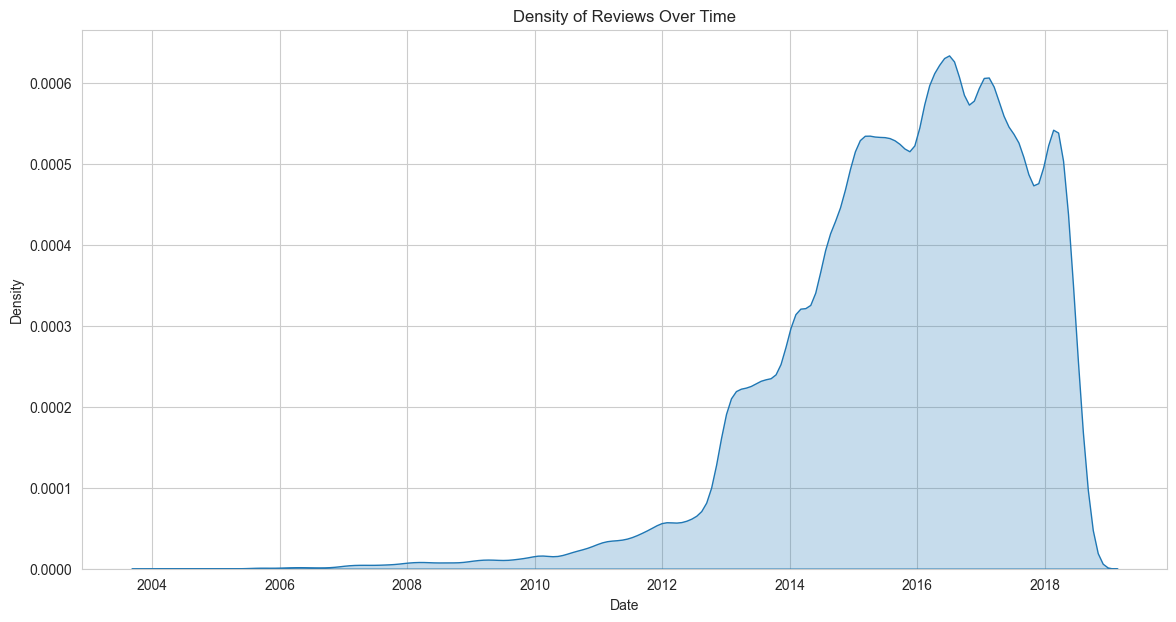

In [116]:
import seaborn as sns

import matplotlib.pyplot as plt

# Ensure 'reviewTime' is in datetime format, errors='coerce' will turn unparseable dates into NaT
final_df['reviewTime'] = pd.to_datetime(final_df['reviewTime'], errors='coerce')

# Drop rows where reviewTime could not be parsed
final_df.dropna(subset=['reviewTime'], inplace=True)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# --- Plot 1: Density of Reviews Over Time ---
print("Density of Reviews Over Time")
sns.kdeplot(data=final_df['reviewTime'], fill=True)
plt.title('Density of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()



Number of Reviews per Month


/var/folders/pd/h66kmrq93ds1ttlrgcb9p_l80000gn/T/ipykernel_36056/4140196371.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_per_month = final_df.set_index('reviewTime').resample('M').size()


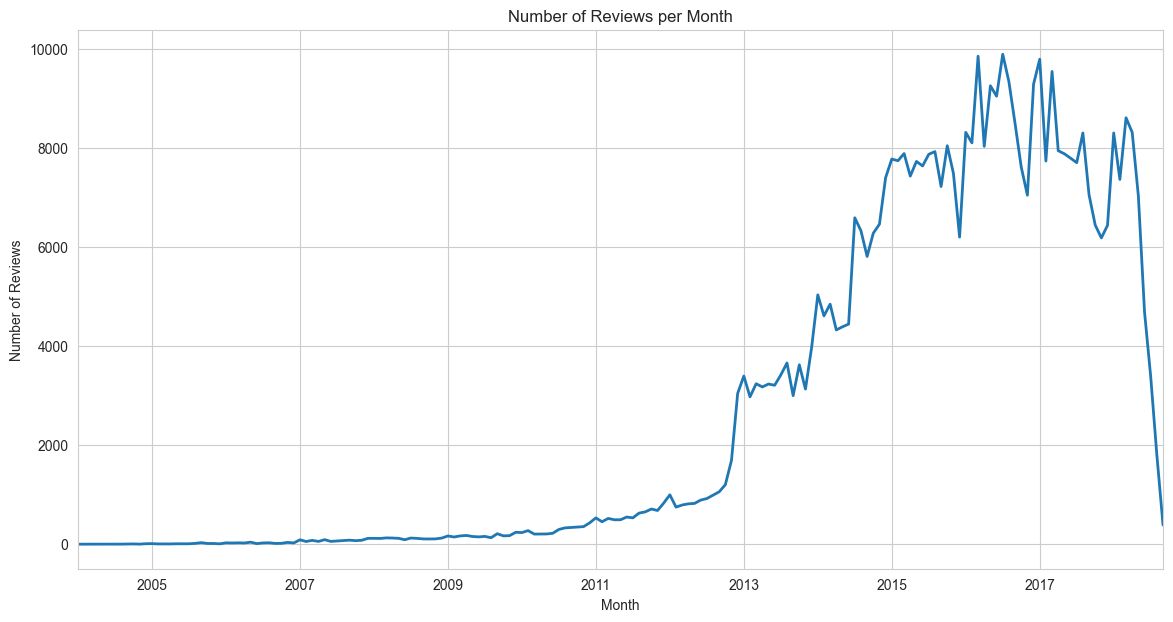

In [118]:
# --- Plot 2: Number of Reviews per Month ---
print("\n\nNumber of Reviews per Month")
# Resample to get the count of reviews per month
reviews_per_month = final_df.set_index('reviewTime').resample('M').size()
reviews_per_month.plot(lw=2)
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()




Number of Reviews per Year


/var/folders/pd/h66kmrq93ds1ttlrgcb9p_l80000gn/T/ipykernel_36056/3514107940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_year.index, y=reviews_per_year.values, palette="viridis")


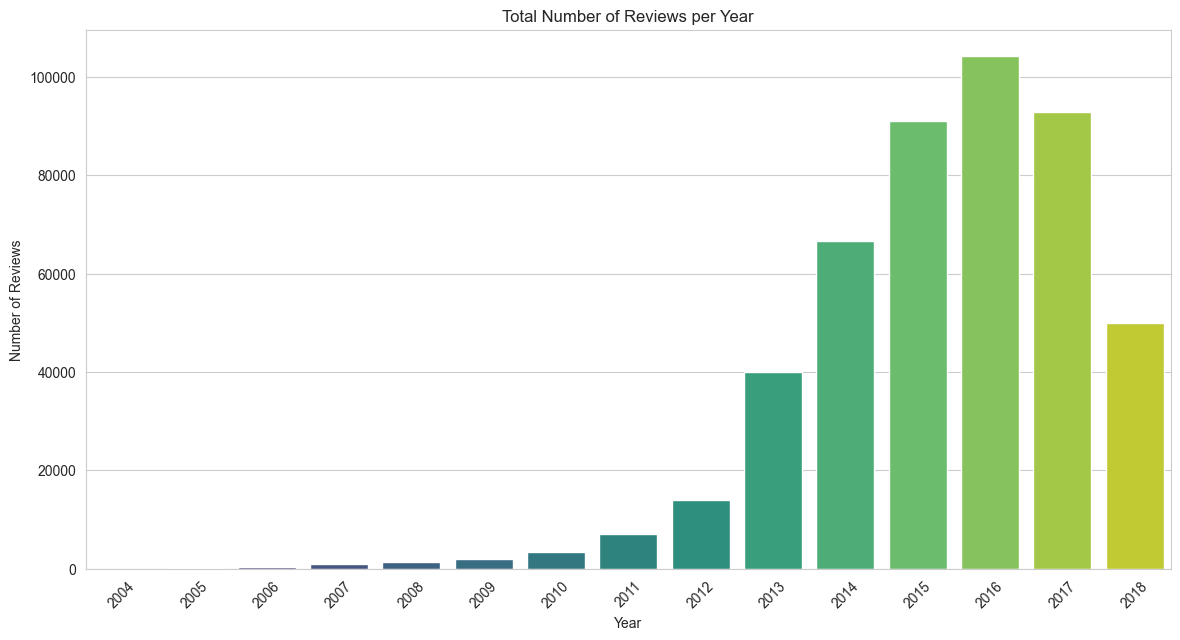

In [ ]:
# --- Plot 3: Number of Reviews per Year ---
print("\n\nNumber of Reviews per Year")
reviews_per_year = final_df['reviewTime'].dt.year.value_counts().sort_index()
sns.barplot(x=reviews_per_year.index, y=reviews_per_year.values, palette="viridis")
plt.title('Total Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()



Number of Reviews by Month (Aggregated Across All Years)


/var/folders/pd/h66kmrq93ds1ttlrgcb9p_l80000gn/T/ipykernel_36056/3738193408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_by_month_of_year.index, y=reviews_by_month_of_year.values, palette="plasma")


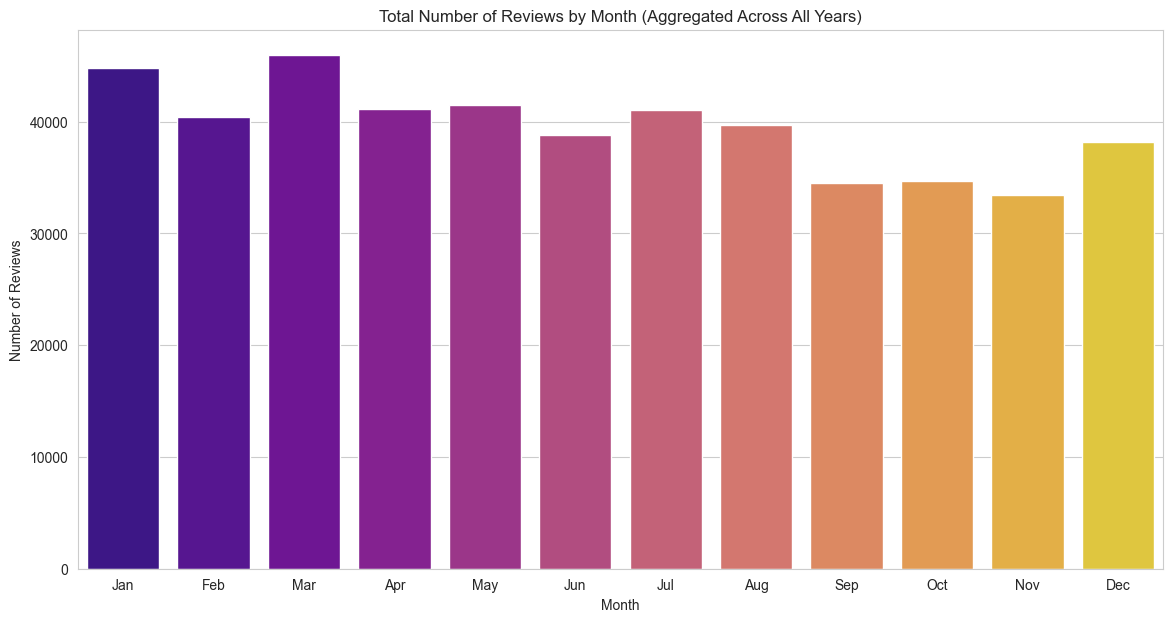

In [120]:

# --- Plot 4: Number of Reviews per Month of the Year (Aggregated) ---
print("\n\nNumber of Reviews by Month (Aggregated Across All Years)")
reviews_by_month_of_year = final_df['reviewTime'].dt.month.value_counts().sort_index()
sns.barplot(x=reviews_by_month_of_year.index, y=reviews_by_month_of_year.values, palette="plasma")
plt.title('Total Number of Reviews by Month (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_labels)
plt.show()

In [121]:
# Filter the DataFrame to include reviews from 2014 to 2018
dfv2 = final_df[(final_df['reviewTime'].dt.year >= 2014) & (final_df['reviewTime'].dt.year <= 2018)]

# Display the shape of the filtered dataframe
print("Shape of the filtered dataframe:", dfv2.shape)

# Display the date range to confirm
print("\nDate range of the filtered dataframe:")
print("Min date:", dfv2['reviewTime'].min())
print("Max date:", dfv2['reviewTime'].max())

Shape of the filtered dataframe: (404545, 12)

Date range of the filtered dataframe:
Min date: 2014-01-01 00:00:00
Max date: 2018-09-29 00:00:00


In [125]:
dfv2.head(2)

,asin,title,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,Great hand lotion,Five Stars,Item can be shipped within U.S.,This item can be shipped to select countries o...
3,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...,[https://images-na.ssl-images-amazon.com/image...,5.0,NaN,True,2018-04-18,This is the best for the severely dry skin on ...,Five Stars,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [128]:
top_occurring_asins = dfv2['asin'].value_counts().head(20)
top_occurring_asins.sum()

np.int64(37263)

In [ ]:
# taking top 20 ASINs dfv2
top_asins_df = dfv2[dfv2['asin'].isin(top_occurring_asins.index)]

top_asins_df.shape

,asin,title,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
2354,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,1.0,NaN,True,2018-05-12,Doesnt match the regular color of the real pro...,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
2355,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,3.0,NaN,True,2018-05-12,Not pigmented enough. Needed three coats and s...,Low pigment,"Currently, item can be shipped only within the...",This item is not eligible for international sh...


Density of Reviews Over Time


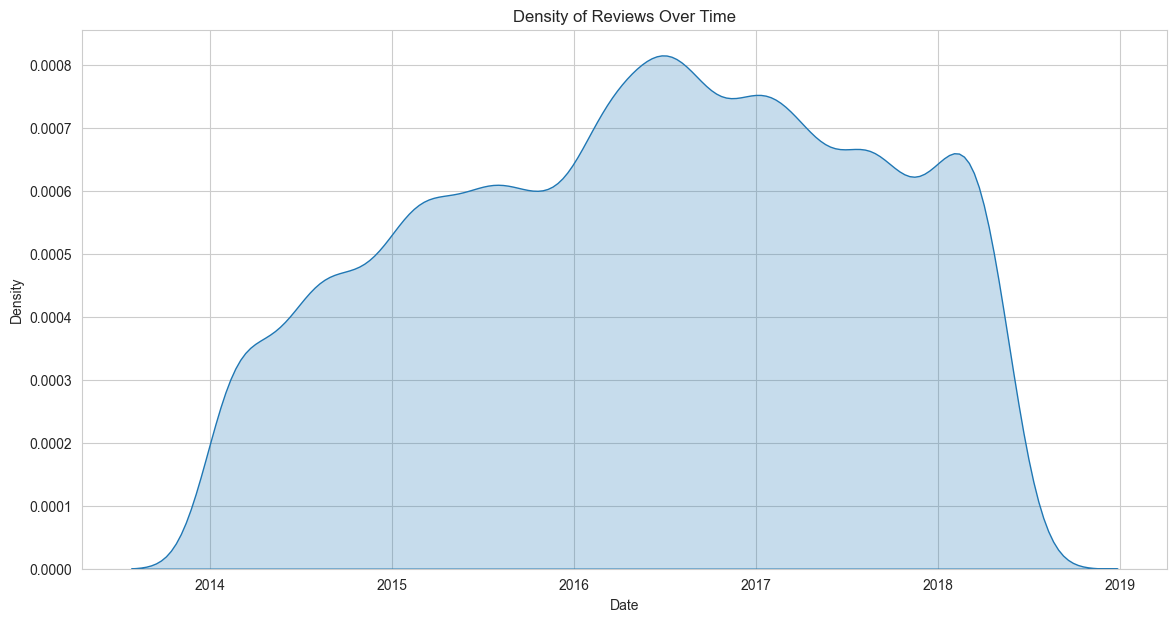

In [131]:
# --- Plot 1: Density of Reviews Over Time ---
print("Density of Reviews Over Time")
sns.kdeplot(data=top_asins_df['reviewTime'], fill=True)
plt.title('Density of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()

In [135]:
# save the final dataframe to a JSON file
top_asins_df.reset_index(drop=True, inplace=True)
top_asins_df.to_json(
    'top_asins_amazon_data_v2.json',
    orient='records',
    lines=True
)

In [139]:
top_asins_df.head(1)

,asin,title,description,imageURLHighRes,overall,vote,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,1.0,NaN,True,2018-05-12,Doesnt match the regular color of the real pro...,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...




Distribution of Overall Ratings


/var/folders/pd/h66kmrq93ds1ttlrgcb9p_l80000gn/T/ipykernel_36056/1668766877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='mako')


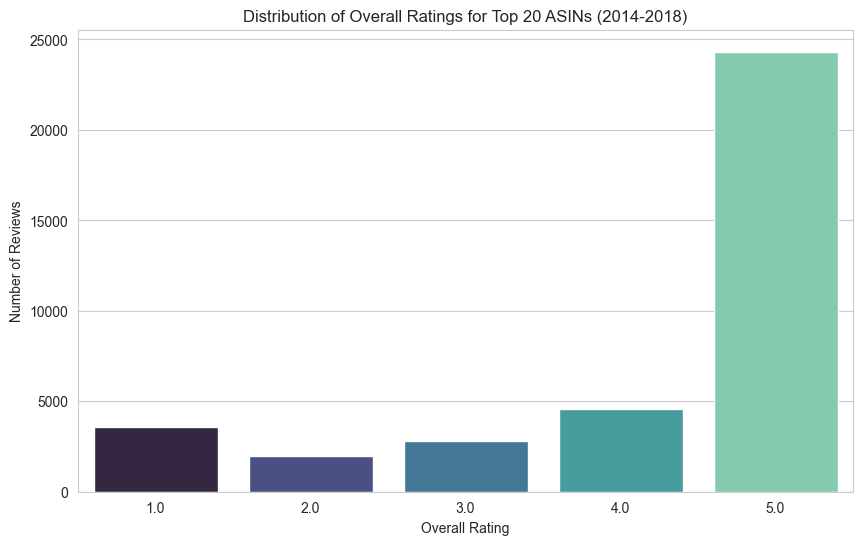

In [141]:
# --- Plot 5: Distribution of Overall Ratings ---
print("\n\nDistribution of Overall Ratings")
# Get the value counts for the 'overall' column
overall_counts = top_asins_df['overall'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='mako')

# Add title and labels
plt.title('Distribution of Overall Ratings for Top 20 ASINs (2014-2018)')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

In [143]:
top_asins_df['overall'].value_counts()/ top_asins_df.shape[0]

overall
5.0    0.652765
4.0    0.122481
1.0    0.096718
3.0    0.074685
2.0    0.053351
Name: count, dtype: float64

In [ ]:
# I think, vote is almost empty so ...
top_asins_df.drop(columns=['vote'], inplace=True)


In [150]:
top_asins_df.to_json(
    'amazon_data_v2.json'
)

In [146]:
top_asins_df.isna().sum()

asin                          0
title                         0
description                   0
imageURLHighRes               0
overall                       0
verified                      0
reviewTime                    0
reviewText                    0
summary                       7
Domestic Shipping         15643
International Shipping    15643
dtype: int64

In [147]:
# now, 
top_asins_df['Domestic Shipping'].value_counts()

Domestic Shipping
Item can be shipped within U.S.                                                                                                                                                   11416
Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.    10204
Name: count, dtype: int64

In [148]:
top_asins_df['International Shipping'].value_counts()

International Shipping
This item can be shipped to select countries outside of the U.S.    12092
This item is not eligible for international shipping.                9528
Name: count, dtype: int64

In [156]:
# duplicate check
# The 'description' and 'imageURLHighRes' columns may contain lists, which are unhashable.
# Convert them to strings to use duplicated().
temp_df = top_asins_df.copy()
for col in ['description', 'imageURLHighRes']:
	if col in temp_df.columns:
		temp_df[col] = temp_df[col].astype(str)

temp_df.duplicated().sum()

np.int64(0)

In [153]:
top_asins_df.head()

,asin,title,description,imageURLHighRes,overall,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,1.0,True,2018-05-12,Doesnt match the regular color of the real pro...,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
1,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,3.0,True,2018-05-12,Not pigmented enough. Needed three coats and s...,Low pigment,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
2,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,4.0,True,2018-05-11,I really liked the color of this polish. It wa...,I really liked the color of this polish,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
3,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,5.0,True,2018-05-11,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
4,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",[Nail lacquer is the original nail polish form...,[https://images-na.ssl-images-amazon.com/image...,1.0,True,2018-05-11,Its counterfeit :/,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...


In [ ]:
# here, imageURLHighRes is a list, it's the first item in the list
top_asins_df['imageURLHighRes'] = top_asins_df['imageURLHighRes'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

In [160]:
top_asins_df.to_csv(
    'amazon_data_v2.csv',
    index=True,
    index_label='id'
)

In [163]:
top_asins_df.columns

Index(['asin', 'title', 'description', 'imageURLHighRes', 'overall',
       'verified', 'reviewTime', 'reviewText', 'summary', 'Domestic Shipping',
       'International Shipping'],
      dtype='object')

In [1]:
import pandas as pd

df = pd.read_csv('amazon_data_v2.csv')
df.head()

,id,asin,title,description,imageURLHighRes,overall,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,0,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",['Nail lacquer is the original nail polish for...,https://images-na.ssl-images-amazon.com/images...,1.0,True,2018-05-12,Doesnt match the regular color of the real pro...,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
1,1,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",['Nail lacquer is the original nail polish for...,https://images-na.ssl-images-amazon.com/images...,3.0,True,2018-05-12,Not pigmented enough. Needed three coats and s...,Low pigment,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
2,2,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",['Nail lacquer is the original nail polish for...,https://images-na.ssl-images-amazon.com/images...,4.0,True,2018-05-11,I really liked the color of this polish. It wa...,I really liked the color of this polish,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
3,3,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",['Nail lacquer is the original nail polish for...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2018-05-11,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,"Currently, item can be shipped only within the...",This item is not eligible for international sh...
4,4,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...",['Nail lacquer is the original nail polish for...,https://images-na.ssl-images-amazon.com/images...,1.0,True,2018-05-11,Its counterfeit :/,One Star,"Currently, item can be shipped only within the...",This item is not eligible for international sh...


In [3]:
df['verified'].value_counts()

verified
True     34498
False     2765
Name: count, dtype: int64

In [15]:
df['description'].head(1).tolist()[0][2:-2]

# make above transformation reusable
def mapping_function(text: str) -> str:
    return text[2:-2]

df['description'] = df['description'].apply(mapping_function)

<Axes: xlabel='reviewTime'>

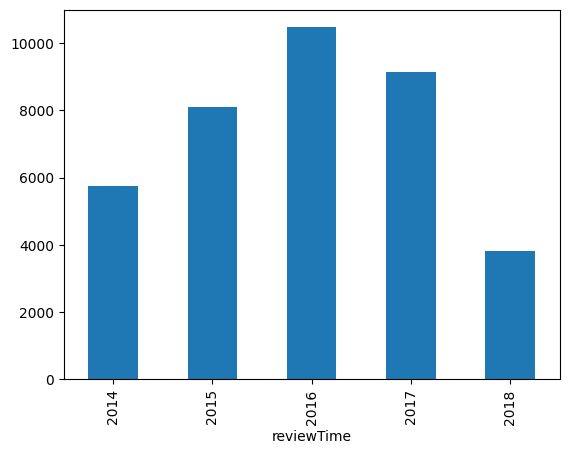

In [21]:
# no. of review by each year
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')
df['reviewTime'].dt.year.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='asin'>

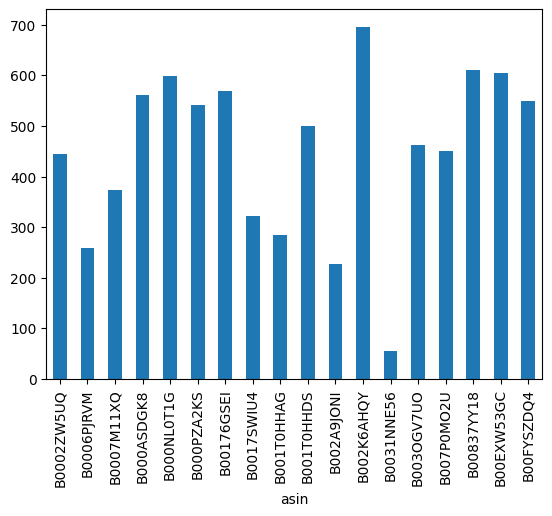

In [30]:
# asin distribution in year 2016
df[df['reviewTime'].dt.year == 2015]['asin'].value_counts().sort_index().plot(kind='bar')

In [40]:
# saving csv of 2015 year only with reset index from the column id
df[df['reviewTime'].dt.year == 2015].reset_index(drop=True).to_csv('amazon_data_v3.csv', index=False)

In [41]:
new_df = pd.read_csv('amazon_data_v3.csv')
new_df.head()

,id,asin,title,description,imageURLHighRes,overall,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,4289,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-31,Works exactly like I imagined. I have some pat...,Works great like rainbow sprinkles,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,4290,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-30,"If applied correctly, works well. And pay atte...","If applied correctly, works well. And pay atte...",Item can be shipped within U.S.,This item can be shipped to select countries o...
2,4291,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-28,Works great. Gives confidence. I never have to...,Works great. Gives confidence,Item can be shipped within U.S.,This item can be shipped to select countries o...
3,4292,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-28,I wish I could give this 10 stars! This stuff...,Pure sorcery and magic!,Item can be shipped within U.S.,This item can be shipped to select countries o...
4,4293,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-27,Works great. I'm losing hair due to oral chemo...,great product,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [42]:
# id column as index and reset it
new_df.set_index('id', inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,asin,title,description,imageURLHighRes,overall,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
0,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-31,Works exactly like I imagined. I have some pat...,Works great like rainbow sprinkles,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-30,"If applied correctly, works well. And pay atte...","If applied correctly, works well. And pay atte...",Item can be shipped within U.S.,This item can be shipped to select countries o...
2,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-28,Works great. Gives confidence. I never have to...,Works great. Gives confidence,Item can be shipped within U.S.,This item can be shipped to select countries o...
3,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-28,I wish I could give this 10 stars! This stuff...,Pure sorcery and magic!,Item can be shipped within U.S.,This item can be shipped to select countries o...
4,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-27,Works great. I'm losing hair due to oral chemo...,great product,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [45]:
new_df.index.name = 'id'
new_df.head(1)

,asin,title,description,imageURLHighRes,overall,verified,reviewTime,reviewText,summary,Domestic Shipping,International Shipping
id,,,,,,,,,,,
0,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-31,Works exactly like I imagined. I have some pat...,Works great like rainbow sprinkles,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [46]:
# I want to rename column 'overall' to 'rating'
new_df.rename(columns={'overall': 'Rating', 'reviewText': 'Review', 'asin': 'ASIN', 'reviewTime': 'ReviewTime', 'title': 'Title', 
                       'imageURLHighRes': 'ImageURL',
                       'summary': 'Summary',
                       'verified': 'Verified'}, inplace=True)

In [48]:
new_df.rename(columns={'description': 'Description'}, inplace=True)

In [49]:
new_df.head(1)

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
id,,,,,,,,,,,
0,B0002ZW5UQ,TOPPIK Hair Building Fibers,TOPPIK Hair Building Fibers instantly give you...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-12-31,Works exactly like I imagined. I have some pat...,Works great like rainbow sprinkles,Item can be shipped within U.S.,This item can be shipped to select countries o...


In [50]:
# save it
new_df.to_csv('amazon_data_v3.csv')

In [51]:
new_df.shape

(8104, 11)

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming df is your DataFrame and 'asin' is the column with 20 distinct ASINs
sss = StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=42)

for train_index, sample_index in sss.split(new_df, new_df['ASIN']):
    sampled_df = new_df.iloc[sample_index]

# Result: sampled_df has 2K rows with stratified ASIN distribution
sampled_df.shape

(2000, 11)

In [55]:
sampled_df.head(2)

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
id,,,,,,,,,,,
6718,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and...","Proraso Shaving Soap, Refreshing and Toning fo...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-18,This is all it claims to be. A very good shave...,A good & refreshing shave,Item can be shipped within U.S.,This item can be shipped to select countries o...
6234,B007P0MO2U,SEXYHAIR Big Powder Play Volumizing &amp; Text...,Can re-activate with a quick scrunching motion...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-03-20,I use this daily and it helps give my thin hai...,Five Stars,NaN,NaN


<Axes: title={'center': 'Distribution of ASIN in new_df'}, xlabel='ASIN'>

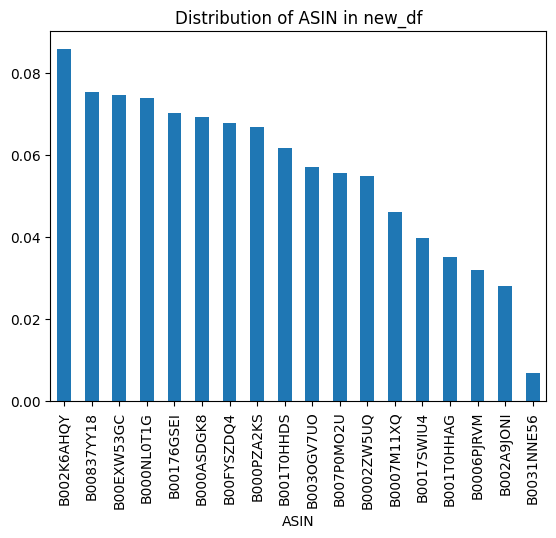

In [56]:
# distribution of ASIN in new_df
asin_distribution = new_df['ASIN'].value_counts(normalize=True)
asin_distribution.plot(kind='bar', title='Distribution of ASIN in new_df')

In [59]:
# save it
sampled_df.to_csv('amazon_data_v4.csv')

In [60]:
sample = pd.read_csv('amazon_data_v4.csv')
sample.head(2)

,id,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
0,6718,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and...","Proraso Shaving Soap, Refreshing and Toning fo...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-18,This is all it claims to be. A very good shave...,A good & refreshing shave,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,6234,B007P0MO2U,SEXYHAIR Big Powder Play Volumizing &amp; Text...,Can re-activate with a quick scrunching motion...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-03-20,I use this daily and it helps give my thin hai...,Five Stars,NaN,NaN


In [61]:
sample.shape

(2000, 12)

In [62]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2000 non-null   int64  
 1   ASIN                    2000 non-null   object 
 2   Title                   2000 non-null   object 
 3   Description             2000 non-null   object 
 4   ImageURL                2000 non-null   object 
 5   Rating                  2000 non-null   float64
 6   Verified                2000 non-null   bool   
 7   ReviewTime              2000 non-null   object 
 8   Review                  2000 non-null   object 
 9   Summary                 2000 non-null   object 
 10  Domestic Shipping       1092 non-null   object 
 11  International Shipping  1092 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 174.0+ KB


In [63]:
# change ReviewTime
sample['ReviewTime'] = pd.to_datetime(sample['ReviewTime'])
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2000 non-null   int64         
 1   ASIN                    2000 non-null   object        
 2   Title                   2000 non-null   object        
 3   Description             2000 non-null   object        
 4   ImageURL                2000 non-null   object        
 5   Rating                  2000 non-null   float64       
 6   Verified                2000 non-null   bool          
 7   ReviewTime              2000 non-null   datetime64[ns]
 8   Review                  2000 non-null   object        
 9   Summary                 2000 non-null   object        
 10  Domestic Shipping       1092 non-null   object        
 11  International Shipping  1092 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64

In [64]:
sample.to_csv('amazon_data_v4.csv', index=False)

In [ ]:
# make sample id as index
sample = sample.set_index('id')
sample.head(2)
# reset index

KeyError: "None of ['id'] are in the columns"

In [75]:
# sample = sample.reset_index()
sample.head(2)

,level_0,index,id,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
0,0,0,6718,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and...","Proraso Shaving Soap, Refreshing and Toning fo...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-18,This is all it claims to be. A very good shave...,A good & refreshing shave,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,1,1,6234,B007P0MO2U,SEXYHAIR Big Powder Play Volumizing &amp; Text...,Can re-activate with a quick scrunching motion...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-03-20,I use this daily and it helps give my thin hai...,Five Stars,NaN,NaN


In [76]:
sample.columns

Index(['level_0', 'index', 'id', 'ASIN', 'Title', 'Description', 'ImageURL',
       'Rating', 'Verified', 'ReviewTime', 'Review', 'Summary',
       'Domestic Shipping', 'International Shipping'],
      dtype='object')

In [77]:
sample.drop(columns=['level_0', 'index', 'id'], inplace=True)

In [78]:
sample.head(2)

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
0,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and...","Proraso Shaving Soap, Refreshing and Toning fo...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-18,This is all it claims to be. A very good shave...,A good & refreshing shave,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,B007P0MO2U,SEXYHAIR Big Powder Play Volumizing &amp; Text...,Can re-activate with a quick scrunching motion...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-03-20,I use this daily and it helps give my thin hai...,Five Stars,NaN,NaN


In [79]:
sample.index.name = 'id'
sample.head(2)

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping
id,,,,,,,,,,,
0,B00837YY18,"Proraso Shaving Soap in a Bowl, Refreshing and...","Proraso Shaving Soap, Refreshing and Toning fo...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-18,This is all it claims to be. A very good shave...,A good & refreshing shave,Item can be shipped within U.S.,This item can be shipped to select countries o...
1,B007P0MO2U,SEXYHAIR Big Powder Play Volumizing &amp; Text...,Can re-activate with a quick scrunching motion...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-03-20,I use this daily and it helps give my thin hai...,Five Stars,NaN,NaN


In [81]:
sample.to_csv('amazon_data_v4.csv', index=True)

In [82]:
sample.shape

(2000, 11)

In [92]:
sample[sample['Rating'] == 3]['Review'].shape

(153,)

In [ ]:
import numpy as np
# Add Sentiment column based on Rating
sample['Sentiment'] = None  # Initialize with None (which becomes NaN)

# Assign sentiment values based on rating thresholds
sample.loc[sample['Rating'] <= 2, 'Sentiment'] = -1
sample.loc[sample['Rating'] >= 4, 'Sentiment'] = 1
sample.loc[sample['Rating'] == 3, 'Sentiment'] = np.nan  # Optionally change to NaN if preferred, later replace by LLM

# Check the distribution of sentiment values
sentiment_counts = sample['Sentiment'].value_counts()
print(sentiment_counts)

# Verify with a cross-tabulation of Rating vs Sentiment
print("\nCross-tabulation of Rating vs Sentiment:")
print(pd.crosstab(sample['Rating'], sample['Sentiment']))

Sentiment
1     1610
-1     237
Name: count, dtype: int64

Cross-tabulation of Rating vs Sentiment:
Sentiment   -1     1
Rating              
1.0        138     0
2.0         99     0
4.0          0   304
5.0          0  1306


In [96]:
sample.to_csv('amazon_data_v4.csv', index=True)

In [ ]:
s

ASIN
B002K6AHQY    171
B00837YY18    150
B00EXW53GC    149
B000NL0T1G    148
B00176GSEI    140
B000ASDGK8    138
B00FYSZDQ4    136
B000PZA2KS    134
B001T0HHDS    123
B003OGV7UO    114
B007P0MO2U    111
B0002ZW5UQ    110
B0007M11XQ     92
B0017SWIU4     80
B001T0HHAG     70
B0006PJRVM     64
B002A9JONI     56
B0031NNE56     14
Name: count, dtype: int64


In [99]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming df is your DataFrame and 'asin' is the column with 20 distinct ASINs
sss = StratifiedShuffleSplit(n_splits=1, test_size=200, random_state=42)

for train_index, sample_index in sss.split(sample, sample['ASIN']):
    sampled_df = sample.iloc[sample_index]

# Result: sampled_df has 2K rows with stratified ASIN distribution
sampled_df.shape

(200, 12)

In [100]:
sampled_df.head()

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping,Sentiment
id,,,,,,,,,,,,
1152,B002K6AHQY,"CND Vinylux Weekly Nail Polish, Rock Royalty,...",Vinylux weekly polish and weekly top coat are ...,https://images-na.ssl-images-amazon.com/images...,3.0,True,2015-10-19,This color not as good as the others,Three Stars,"Currently, item can be shipped only within the...",This item is not eligible for international sh...,NaN
74,B00176GSEI,HOT TOOLS Professional 24k Gold Extra-Long Bar...,Hot Tools Professional 1110 Curling Iron with ...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-11-17,I've been using this curling iron for YEARS an...,The Best Curling Iron,NaN,NaN,1
21,B000ASDGK8,BaBylissPRO Ceramix Xtreme Dryer,2000 Watt ceramic technology dryer with concen...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-09-30,I think it works well and I love it. Much bett...,Five Stars,NaN,NaN,1
1303,B002K6AHQY,"CND Vinylux Weekly Nail Polish, Rock Royalty,...",Vinylux weekly polish and weekly top coat are ...,https://images-na.ssl-images-amazon.com/images...,2.0,True,2015-07-03,Not my favorite color. I expected more yellow ...,Just eh. Beware of shimmer.,"Currently, item can be shipped only within the...",This item is not eligible for international sh...,-1
1042,B00FYSZDQ4,COLOR WOW Root Cover Up,"Color Wow root cover up, winner of 44 major be...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-16,Was recommended by a friend . Easy to apply. ...,nice product,NaN,NaN,1


In [102]:
sampled_df.reset_index(drop=True, inplace=True)
sampled_df.index.name = 'id'

sampled_df.to_csv('sampled_amazon_data.csv', index=False)

In [103]:
sampled_df.to_csv('sampled_amazon_data.csv', index=True)

In [104]:
sampled_df.head()

,ASIN,Title,Description,ImageURL,Rating,Verified,ReviewTime,Review,Summary,Domestic Shipping,International Shipping,Sentiment
id,,,,,,,,,,,,
0,B002K6AHQY,"CND Vinylux Weekly Nail Polish, Rock Royalty,...",Vinylux weekly polish and weekly top coat are ...,https://images-na.ssl-images-amazon.com/images...,3.0,True,2015-10-19,This color not as good as the others,Three Stars,"Currently, item can be shipped only within the...",This item is not eligible for international sh...,NaN
1,B00176GSEI,HOT TOOLS Professional 24k Gold Extra-Long Bar...,Hot Tools Professional 1110 Curling Iron with ...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-11-17,I've been using this curling iron for YEARS an...,The Best Curling Iron,NaN,NaN,1
2,B000ASDGK8,BaBylissPRO Ceramix Xtreme Dryer,2000 Watt ceramic technology dryer with concen...,https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-09-30,I think it works well and I love it. Much bett...,Five Stars,NaN,NaN,1
3,B002K6AHQY,"CND Vinylux Weekly Nail Polish, Rock Royalty,...",Vinylux weekly polish and weekly top coat are ...,https://images-na.ssl-images-amazon.com/images...,2.0,True,2015-07-03,Not my favorite color. I expected more yellow ...,Just eh. Beware of shimmer.,"Currently, item can be shipped only within the...",This item is not eligible for international sh...,-1
4,B00FYSZDQ4,COLOR WOW Root Cover Up,"Color Wow root cover up, winner of 44 major be...",https://images-na.ssl-images-amazon.com/images...,5.0,True,2015-04-16,Was recommended by a friend . Easy to apply. ...,nice product,NaN,NaN,1
